In [ ]:
# Imports 

In [1]:
import os 
import pandas as pd 
from os import listdir
from datetime import date, datetime, timedelta
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
from textblob import TextBlob 
import datetime as dt
pd.set_option('display.max_colwidth', 100)
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns
from sklearn.model_selection import train_test_split
import pyflux as pf

In [58]:
# Import Raw File 
# Output Cleaned Dataset to CSV for future use 

In [59]:
raw_data = pd.read_csv('Combined_Raw_Hourly_Data.csv')

In [60]:
# Clean Helper Function

# filter dataframe using 'language' column
def filter_lang(dataframe):
    dataframe = dataframe.loc[dataframe['lang'] == 'en']
    return dataframe

# filter dataframe using 'sourceLabel' column
def filter_source(dataframe):
    dataframe.loc[dataframe['sourceLabel'].str.contains('iPad|iPhone|Mac'), 'sourceLabel'] = 'twitter for ios'
    dataframe.loc[dataframe['sourceLabel'].str.contains('Android'), 'sourceLabel'] = 'twitter for android'
    dataframe.loc[dataframe['sourceLabel'].str.contains('News'), 'sourceLabel'] = 'news sources'
    return dataframe

# apply both filter_lang and filter_source functions to a dataframe
def filtered_data(dataframe):
    dataframe = filter_lang(dataframe)
    dataframe = filter_source(dataframe)
    return dataframe

In [61]:
#https://aronakhmad.medium.com/twitter-data-cleaning-using-python-db1ec2f28f08
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud,STOPWORDS 
from nltk.stem.porter import PorterStemmer

nltk.download(["names","stopwords","state_union","twitter_samples","averaged_perceptron_tagger","vader_lexicon","punkt"])

n_words = set(stopwords.words('english')) # stop words list 
porter = PorterStemmer()


stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\bhuwa\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhuwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\bhuwa\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\bhuwa\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bhuwa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bhuwa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_le

In [62]:
# Clean using the functions above 
filtered_english_df = filter_lang(raw_data)

filtered_source_df = filter_source(filtered_english_df)

filtered_source_df['content'] = filtered_source_df.content.apply(lambda x: clean(x))

C:\Users\bhuwa\AppData\Local\Temp/ipykernel_22616/2094428378.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3]:
# Clean Data 
# filtered_source_df.to_csv('Filtered_Combined.csv', index=False)

# Output Cleaned Dataset 
data_df = pd.read_csv('Filtered_Combined.csv')

Text(0, 0.5, 'Stock price')

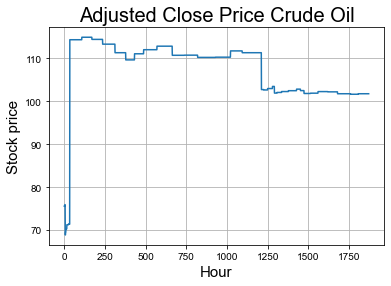

In [4]:
# Sentiment Analyser Functions 
data_df['Adj Close'].plot(grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price Crude Oil', color = 'black', fontsize = 20)
plt.xlabel('Hour', color = 'black', fontsize = 15)
plt.ylabel('Stock price', color = 'black', fontsize = 15)

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

#iterate through the tweets and get polarity scores using vader 
scores = data_df['content'].apply(vader.polarity_scores).to_list()

In [6]:
scores_df = pd.DataFrame(scores)

parsed_scores_data = data_df.join(scores_df, rsuffix='_right')

parsed_scores_data.head(2)

,date,Open,High,Low,Close,Adj Close,Volume,_type,url,content,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,neg,neu,pos,compound
0,2021-11-21 21:00:00+00:00,75.459999,75.690002,75.330002,75.580002,75.580002,4581,snscrape.modules.twitter.Tweet,https://twitter.com/jsmith9999992/status/1462529814976413698,biancoresearch rough oil consum franc eu countri suppli russia russia invad ukrain franc rest w...,...,"{'_type': 'snscrape.modules.twitter.User', 'username': 'biancoresearch', 'id': 188369814, 'displ...","[{'_type': 'snscrape.modules.twitter.User', 'username': 'biancoresearch', 'id': 188369814, 'disp...",NaN,NaN,NaN,NaN,0.0,0.956,0.044,0.0258
1,2021-11-21 21:00:00+00:00,75.459999,75.690002,75.330002,75.580002,75.580002,4581,snscrape.modules.twitter.Tweet,https://twitter.com/Convertbond/status/1462524553335349249,us intellig show mass russia troop buildup near ukraine\r\reu us beg opec russia oil gas putin,...,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Convertbond', 'id': 25163231, 'displayna...",NaN,NaN,NaN,NaN,NaN,0.0,1.000,0.000,0.0000


In [8]:
x = parsed_scores_data[['High', 'Low', 'Volume', 'Open', 'compound', 'Close']]
y = parsed_scores_data['Adj Close']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

<AxesSubplot:>

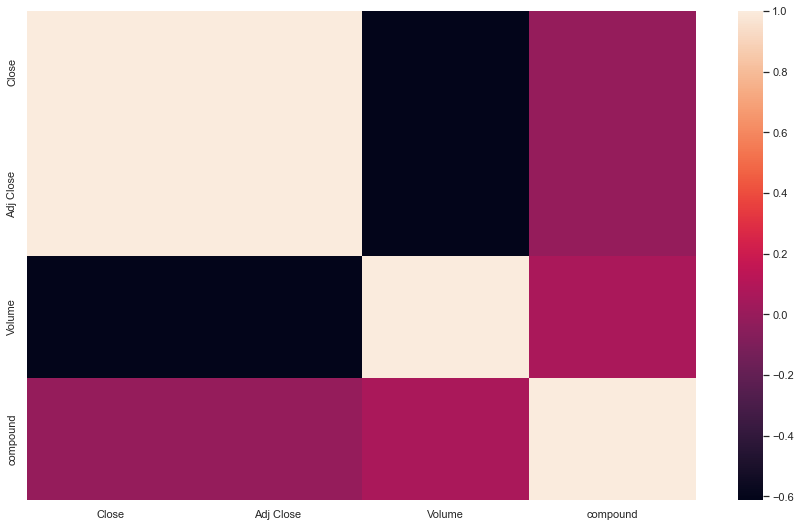

In [9]:
z = parsed_scores_data[['Close', 'Adj Close', 'Volume', 'compound']]
sns.heatmap(z.corr())

In [10]:
# Prophet Time Series Mstock_df 
stock_df = parsed_scores_data[['date','Adj Close']]

# Prep Data
stock_df = parsed_scores_data.reset_index() 
train_model_data = stock_df.rename(columns={'date': 'ds', 'Adj Close': 'y'})

In [13]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, LSTM, GRU
from keras.layers import Dropout
from keras.layers import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
# LSTM or RCNN